1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.
2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).
3. *Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).

Логичным усовершенствованием алгоритма kNN является добавление соседям весов (так называемое "взвешенное голосование"), зависящих от их порядкового номера или расстояния до классифицируемого объекта (чем ближе объект обучающей выборки, тем больше его вес).

1 способ : 

**От номера соседа $i$ веса можно определять как:**

### - $w(i) = q^{i}$,   $q \in (0,1)$;
### - $w(i) = \frac{1}{i}$;

2 способ:

**От расстояния $d$ веса можно определять как:**

### - $w(d) = q^{d}$,   $q \in (0,1)$;
### - $w(d) = \frac{1}{d+a}$,


**1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.**

Буду добавлять веса в зависимости от расстояния(d) по формуле - $w(d) = \frac{1}{d+a}$,
где a - это какая то очень маленькая величина. 

Делается что бы обезопасить себя от деления на ноль, т.к. при d=0, вес будет очень большим и пойдет переобучение.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)#делается во избежание дизбаланса, тут его нет, но на всякий случай.
X_train.shape, X_test.shape

((120, 2), (30, 2))

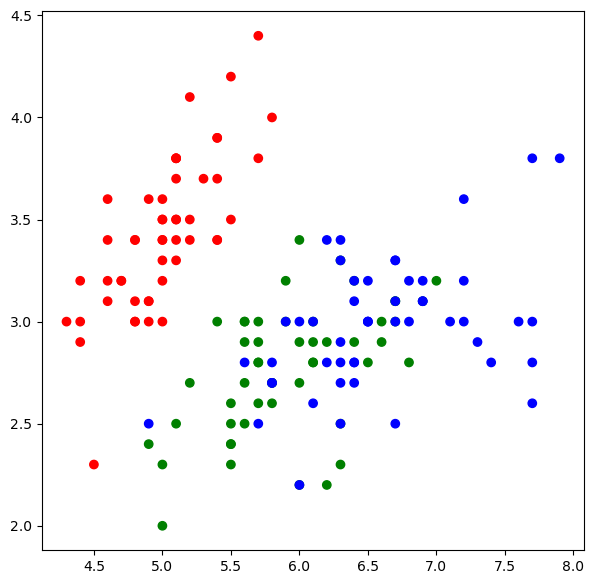

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [6]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [7]:
def weight_from_distance(d, a):
    return 1/(d + a)

In [8]:
def knn(x_train, y_train, x_test, k, a = 1, wv=1):

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            weight = 1
            # Расчет весового коэффициента, в случае задания варианта расчета.
            if wv == 1:
                weight = weight_from_distance(a, len(test_distances)+1)
            elif wv == 2:
                weight = weight_from_distance(a, distance) 
            elif wv == 3:
                weight = weight_from_distance(a, distance)  
            elif wv == 4:
                weight = weight_from_distance(a, len(test_distances)+1) 

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((weight*distance, y_train[i])) 

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [9]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 2: 0.733
(2352, 2)


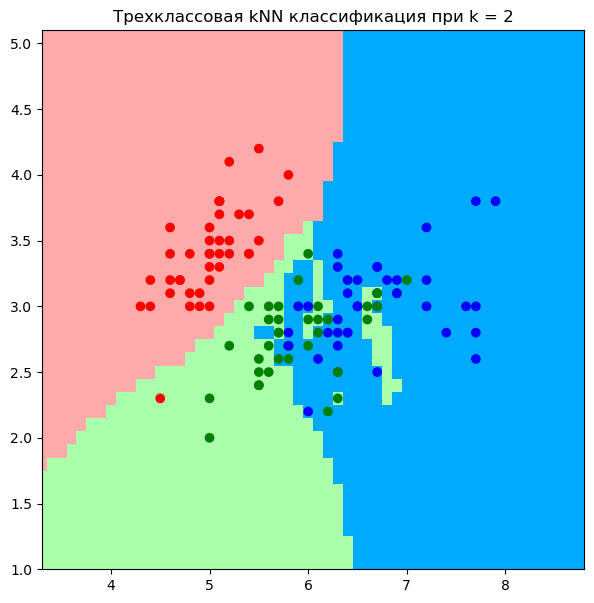

In [11]:
k = 2 #пробуем на 2х ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.700
(2352, 2)


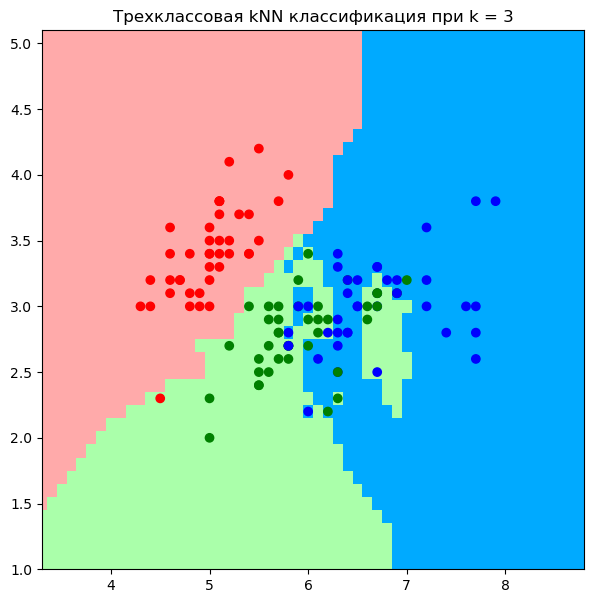

In [12]:
k = 3 #пробуем на 3х ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.767
(2352, 2)


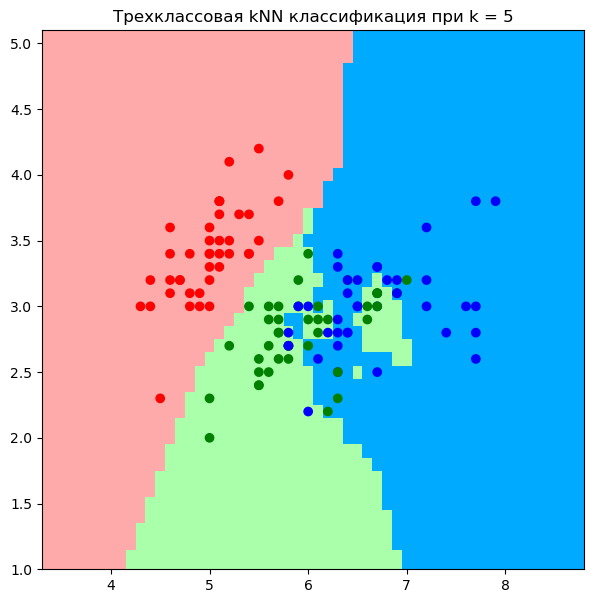

In [13]:
k = 5 #пробуем на 5х ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.667
(2352, 2)


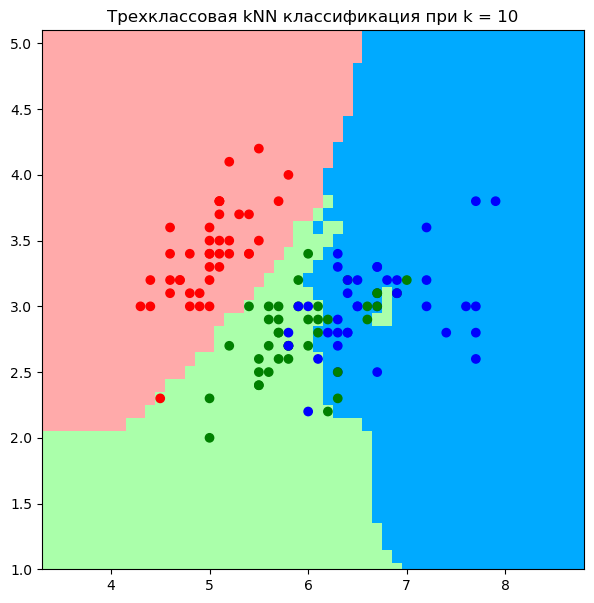

In [14]:
k = 10 #пробуем на 10ти ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Видим, что на 10ти точность снижается, брать четное количество соседей, для голосования в целом не рекомендуется,  но у нас есть добавление весов, так что с этим проблемы быть не должно. Попробуем посмотреть еще на 9ти, 6ти, и возможно 7и соседях .

Точность алгоритма при k = 9: 0.700
(2352, 2)


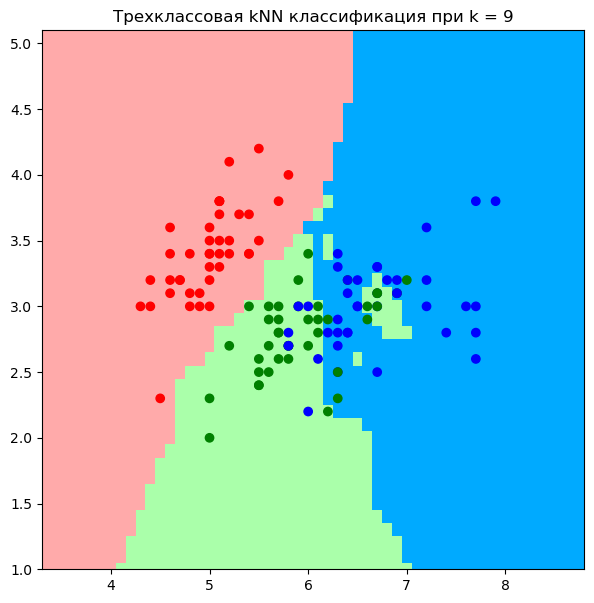

In [15]:
k = 9 #пробуем на 9ти ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Точность алгоритма при k = 6: 0.767
(2352, 2)


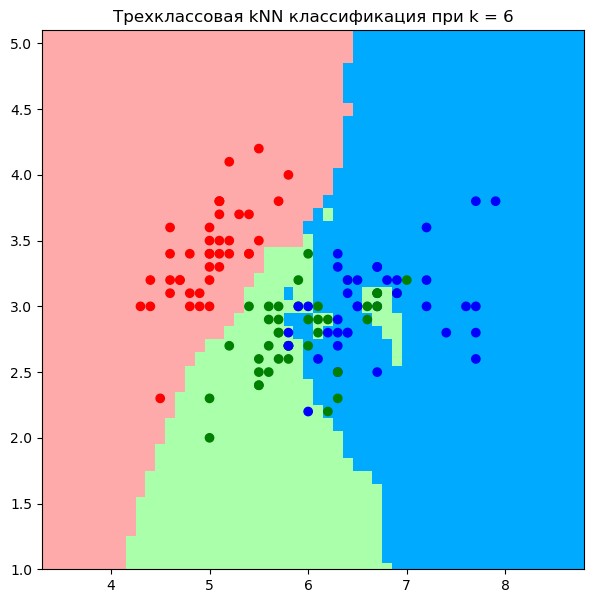

In [16]:
k = 6 #пробуем на 6ти ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

Точность алгоритма при k = 7: 0.733
(2352, 2)


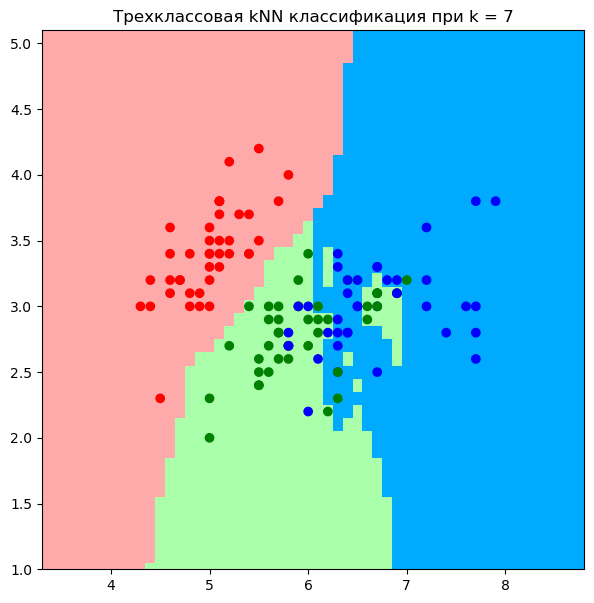

In [17]:
k = 7 #пробуем на 7ми ближ. соседях

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k)

**Да, мы наглядно видим, что из за четного количества соседей точность не падает, т.к. у нас идет надбавка веса и точность на 5ти и 6ти соседях одинаковая, я вот с седьмого и далее она начинает падать, следовательно для этих данных это слишком большое количество соседей и лучше остановится на 5ти.**